# Setup

In [1]:
import crispr as cr 
from crispr.crispr_class import Crispr
import pertpy
import muon
import os
import pandas as pd
import numpy as np
from config import (files_data, col_cell_type_data, col_gene_symbols_data, 
                    assays_data, layer_perturbation_data,
                    col_perturbation_data, key_control_data, 
                    col_split_by_data, layer_perturbation_data,
                    label_perturbation_type_data, col_target_genes_data,
                    key_treatment_data, col_guide_rna_data, col_batch_data,
                    col_sample_id_data, load_example_data)

# Options
print(dir(cr.ax))
n_threads = 4
# file = "CRISPRi_scr"
file="CRISPRi_ess"
# file = "ECCITE"
# file = "augur_ex"
# file = "screen"
# file = "coda"
# file = "perturb-seq"
write_public = True  # if need to download public data, write to examples/data?

#  Set Arguments
col_cell_type = col_cell_type_data[file]
col_sample_id = col_sample_id_data[file]
col_perturbation = col_perturbation_data[file]
col_target_genes = col_target_genes_data[file]
key_control, label_perturbation_type, layer = [
    x[file] for x in [key_control_data, label_perturbation_type_data,
                      layer_perturbation_data]
]
col_gene_symbols = col_gene_symbols_data[file]
if file in assays_data:
    if isinstance(assays_data[file], str) or assays_data[file] is None:
        assays_data[file] = [assays_data[file], None]
    assay, assay_protein = assays_data[file]
else:
    assay, assay_protein = None
key_treatment = key_treatment_data[file]
col_split_by = col_split_by_data[file]
col_guide_rna = col_guide_rna_data[file]
layer_perturbation = layer_perturbation_data[file]
file_path = files_data[file]
col_batch = col_batch_data[file]
kwargs_init = dict(assay=assay, assay_protein=assay_protein,
                   col_gene_symbols=col_gene_symbols, 
                   col_cell_type=col_cell_type, col_sample_id=col_sample_id, 
                   col_perturbation=col_perturbation, col_guide_rna=col_guide_rna,
                   col_target_genes=col_target_genes, col_batch=col_batch,
                   layer_perturbation=layer_perturbation,
                   label_perturbation_type=label_perturbation_type,
                   key_control=key_control, key_treatment=key_treatment)
print(files_data)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analyze_composition', 'cluster', 'clustering', 'compute_distance', 'perform_augur', 'perform_differential_prioritization', 'perform_mixscape', 'perturbations']
{'CRISPRi_scr': '/home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH06.h5', 'CRISPRi_wgs': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_gwps.h5ad', 'CRISPRi_ess': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad', 'pool': '/home/asline01/projects/crispr/examples/data/norman_2019_raw.h5ad', 'bulk': '/home/asline01/projects/crispr/examples/data/burczynski_crohn.h5ad', 'screen': '/home/asline01/projects/crispr/examples/data/dixit_2016_raw.h5ad', 'perturb-seq': '/home/asline01/projects/crispr/examples/data/adamson_2016_upr_perturb_seq.h5ad', 'ECCITE': '/home/asline01/projects/crispr/examples/data/papalexi_2021.h5ad', 'coda': '/hom

# Setup Object

## Instantiate

In [4]:
print("Initialization keyword arguments (from config):\n{kwargs_init}")
ann = Crispr(file_path, **kwargs_init)
col_target_genes = col_target_genes_data[file]
ann.adata.obs[col_target_genes] = ann.adata.obs[
    col_target_genes].astype(str).str.strip(" ").replace(
        "", key_control_data[file]).replace(
            np.nan, key_control_data[file])
ann.adata.obs[col_perturbation_data[file]] = ann.adata.obs[col_target_genes]


<<< LOADING FILE /home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad with sc.read()>>>
AnnData object with n_obs × n_vars = 111445 × 33694
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC

## Preprocess and Cluster

See `ann.figures[run_label]["clustering"]` for figures.

You must set use_highly_variable to False if you don't want to filter by HVGs
and if you did not set kws_hvg to None or False in `.preprocess()`


In that scenario, the 'highly_variable' column in  will be created in `.obsm` 
during `.preprocess()` and then used by defualt in `.cluster`.

AnnData object with n_obs × n_vars = 111445 × 22608
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', '

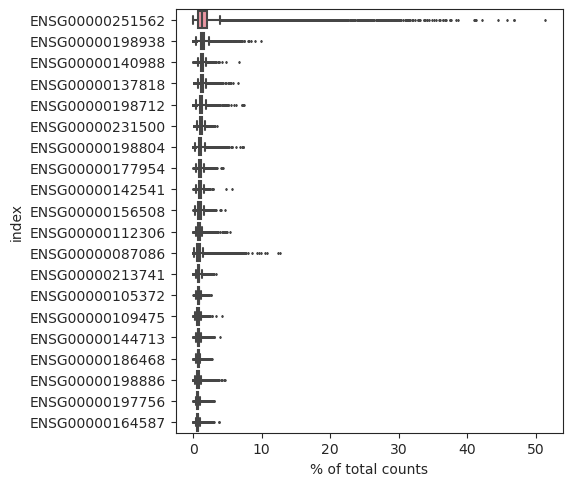


<<< FILTERING >>>

<<< DETECTING MITOCHONDRIAL GENES >>>

<<< PERFORMING QUALITY CONTROL >>>


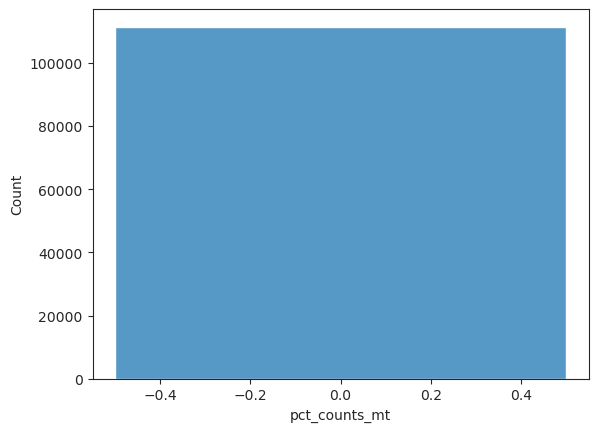

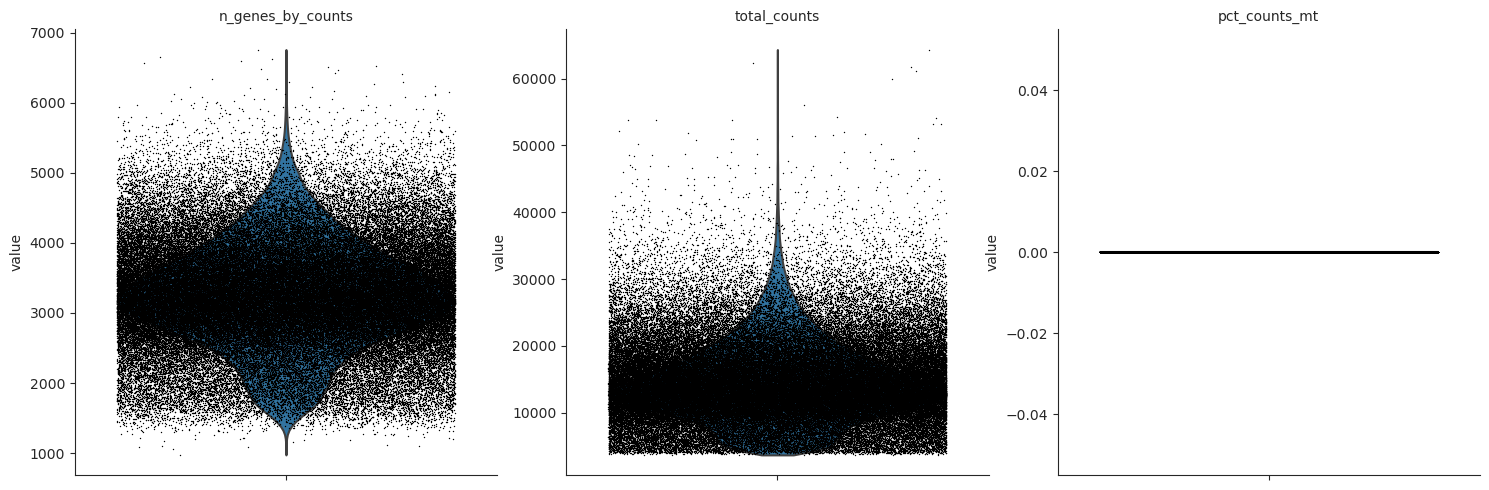

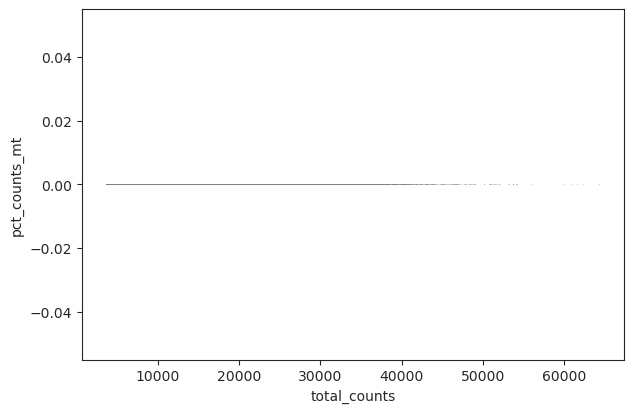

ValueError: `x`, `y`, and potential `color` inputs must all come from either `.obs` or `.var`

In [6]:
# Filtering, Normalization, Scaling, QC
regress_out = None
# regress_out = ['total_counts', 'pct_counts_mt']
# regress_out=["total_counts", "pct_counts_mt", col_batch]
process_kws = dict(kws_hvg=dict(min_mean=0.0125, max_mean=3, min_disp=0.5),
                   target_sum=1e4, max_genes_by_counts=2500, 
                   max_pct_mt=5, min_genes=200, min_cells=3, scale=10,
                   regress_out=regress_out)
_, figs_qc = ann.preprocess(assay_subset=None, **process_kws)  # preprocessing 
kws_pca = dict(n_comps=None, use_highly_variable=True)

# Clustering
ann.cluster(paga=False, method_cluster="leiden",
            kws_pca=kws_pca, kws_neighbors=None, 
            kws_umap=None, kws_cluster=None)

# Analyses

## Cell Type Perturbation Response

<u> __Features__ </u>  

-
- Quantify degree of perturbation response by cell type

<u> __Input__ </u>  

<u> __Output__ </u>  

mean_augur_score

<u> __Notes__ </u>  

- By default, this method will use the 
- Sub-sample sizes equal across condiitons; does not account for perturbation-induced compositional shifts (cell type abundance)
- Scores are for cell types (aggregated across cells, not individual cells)
- Two modes
    - If select_variance_feature=True, run the original Augur implementation, which removes genes that don't vary much across cell type.
    - If False, use features selected by `scanpy.pp.highly_variable_genes()`, which is faster and sensitively recovers effects; however, the feature selection may yield inflated Augur scores because this reduced feature set is used in training, resulting in it taking advantage of the pre-existing power of this feature selection to separate cell types.

In [ ]:
ann.run_mixscape()

# 

Which cell types are most affected by perturbations? Quantify perturbation responses by cell type with Augur, which uses supervised machine learning classification of condition labels (e.g., treated versus untreated, )

## Distance Metrics

See `ann.figures[run_label]["distances"]` and  `ann.results[run_label]["distances"]`
for results.

In [ ]:
# adata = load_example_data(file, col_gene_symbols, 
#                           write_public=write_public)  # (down)load h5ad file
# adata = cr.pp.process_data(adata, assay=assay, assay_protein=assay_protein,
#                            **process_kws)  # process
# figs_cluster = cr.ax.clustering.cluster(adata, assay=assay, plot=True,
#                                         method_cluster="leiden")
# figs_distance = cr.ax.compute_distance(adata, col_perturbation, col_cell_type=col_cell_type, 
#                                        distance_type="edistance", method="X_pca",
#                                        kws_plot=None, highlight_real_range=False, plot=True)

In [ ]:
fig_distance = ann.compute_distance(distance_type="edistance", method="X_pca")